In [1]:
# https://www.kaggle.com/insaff/img-feature-extraction-with-pretrained-resnet
from keras.applications.mobilenet import MobileNet
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
import numpy as np
import os
from scipy.misc import imread
import matplotlib.pyplot as plt
%matplotlib inline
import time
import os.path
import pickle

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model = MobileNet(weights='imagenet', include_top=False)

/anaconda3/lib/python3.6/site-packages/keras_applications/mobilenet.py:206: UserWarning: MobileNet shape is undefined. Weights for input shape (224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


In [3]:
# Replace the category list with the predicted category which u got in the CNN script
Category = ["Men's_Shirts", 'Chiffon', 'Jeans']
image_names=[]


for i in range(0,len(Category)) :
    # Give the path of the semi trained dataset
    path = '/Users/Student/Downloads/visual_search/models/Data/Semi_train/' + Category[i]
    for img_path in os.listdir(path):
        if('.DS_Store' not in os.path.join(path,img_path)):
            image_names.append(img_path)
        

In [4]:
image_names

['4153_comsumer_08.jpg',
 '4154_shop_01.jpg',
 '4155_shop_02.jpg',
 '4156_comsumer_07.jpg',
 '4157_comsumer_06.jpg',
 '4158_comsumer_04.jpg',
 '4159_comsumer_05.jpg',
 '4160_comsumer_01.jpg',
 '4161_comsumer_02.jpg',
 '4162_comsumer_03.jpg',
 '4163_shop_01.jpg',
 '4164_comsumer_01.jpg',
 '4165_shop_01.jpg',
 '4166_comsumer_01.jpg',
 '4167_shop_01.jpg',
 '4168_comsumer_01.jpg',
 '4169_shop_01.jpg',
 '4170_comsumer_01.jpg',
 '4171_shop_01.jpg',
 '4172_comsumer_01.jpg',
 '4173_shop_01.jpg',
 '4174_comsumer_01.jpg',
 '4175_comsumer_08.jpg',
 '4176_shop_01.jpg',
 '4177_shop_02.jpg',
 '4178_comsumer_07.jpg',
 '4179_comsumer_06.jpg',
 '4180_comsumer_04.jpg',
 '4181_comsumer_05.jpg',
 '4182_comsumer_01.jpg',
 '4183_comsumer_02.jpg',
 '4184_comsumer_03.jpg',
 '4185_shop_01.jpg',
 '4186_comsumer_04.jpg',
 '4187_comsumer_05.jpg',
 '4188_comsumer_01.jpg',
 '4189_comsumer_02.jpg',
 '4190_comsumer_03.jpg',
 '4191_shop_01.jpg',
 '4192_shop_02.jpg',
 '4193_comsumer_01.jpg',
 '4194_comsumer_02.jpg',
 '

In [24]:
start = time.time()
Category = ["Men's_Shirts", 'Chiffon', 'Jeans']
# Give the MobileNet pickle file path
pickled_db_path = "features_mnet/" + Category[0] + ".pck"

with open(pickled_db_path, 'rb') as fp:
        mnet_loaded_1 = pickle.load(fp)
        print("loaded")
fp.close()

loaded


In [25]:
# Give the MobileNet pickle file path
pickled_db_path = "features_mnet/" + Category[1] + ".pck"

with open(pickled_db_path, 'rb') as fp:
        mnet_loaded_2 = pickle.load(fp)
        print("loaded")
fp.close()

loaded


In [26]:
mnet_loaded = np.append(mnet_loaded_1,mnet_loaded_2,axis=0)

In [27]:
# Give the MobileNet pickle file path
pickled_db_path = "features_mnet/" + Category[2] + ".pck"

with open(pickled_db_path, 'rb') as fp:
        mnet_loaded_3 = pickle.load(fp)
        print("loaded")
fp.close()

loaded


In [28]:
mnet_loaded = np.append(mnet_loaded,mnet_loaded_3,axis=0)

In [29]:
mnet_loaded.shape

(4682, 50176)

In [30]:
# Give the query path from Semi_train
query_image_path= "images_for_testing/108_comsumer_03.jpg"
imgq = image.load_img(query_image_path, target_size=(224, 224))
img_dataq = image.img_to_array(imgq)
img_dataq = np.expand_dims(img_dataq, axis=0)
img_dataq = preprocess_input(img_dataq)
mnet_feature_query = model.predict(img_dataq)
mnet_feature_np_query = np.array(mnet_feature_query)
mnet_feature_np_query = mnet_feature_np_query.flatten()

In [31]:
mnet_feature_np_query.shape

(50176,)

In [32]:
from scipy.spatial import distance

similarity = []
count = 0

for i in mnet_loaded:
    count = count+1
    d = distance.cosine(i,mnet_feature_np_query)
    sim = 1-d
    similarity.append((sim,image_names[count-1]))


In [18]:
similarity

[(0.30264583230018616, '11038_shop_01.jpg'),
 (0.26508328318595886, '11039_comsumer_04.jpg'),
 (0.24843721091747284, '11040_comsumer_05.jpg'),
 (0.30376115441322327, '11041_comsumer_01.jpg'),
 (0.3073011040687561, '11042_comsumer_02.jpg'),
 (0.2774180471897125, '11043_comsumer_03.jpg'),
 (0.2696799039840698, '11044_comsumer_08.jpg'),
 (0.3009648025035858, '11045_comsumer_09.jpg'),
 (1.0, '11046_shop_01.jpg'),
 (0.26179951429367065, '11047_comsumer_07.jpg'),
 (0.2982363998889923, '11048_comsumer_13.jpg'),
 (0.2884133458137512, '11049_comsumer_12.jpg'),
 (0.28688719868659973, '11050_comsumer_06.jpg'),
 (0.32447755336761475, '11051_comsumer_10.jpg'),
 (0.34005874395370483, '11052_comsumer_04.jpg'),
 (0.28201231360435486, '11053_comsumer_05.jpg'),
 (0.28892242908477783, '11054_comsumer_11.jpg'),
 (0.22979959845542908, '11055_comsumer_15.jpg'),
 (0.27211475372314453, '11056_comsumer_01.jpg'),
 (0.28917068243026733, '11057_comsumer_14.jpg'),
 (0.2647038698196411, '11058_comsumer_02.jpg'),
 (

In [33]:
def show_img(path):
    img =imread(path, mode="RGB")
    plt.imshow(img)
    plt.show()

Query image ==========================================


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


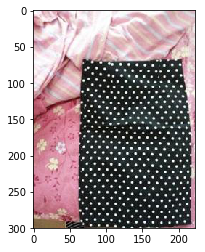

Result images ========================================
similarity 0.39087608456611633


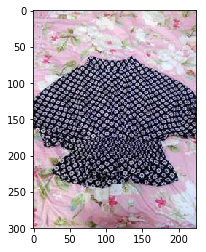

similarity 0.36786410212516785


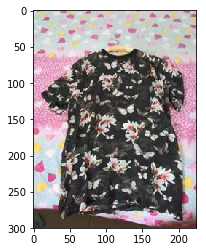

similarity 0.36728063225746155


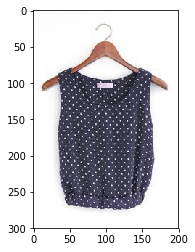

similarity 0.3654509484767914


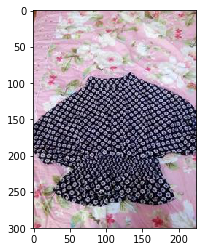

similarity 0.3641657531261444


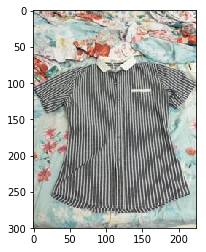

similarity 0.35715988278388977


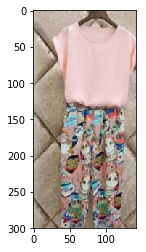

In [39]:
# After sorting images through similarity
des_similarity = sorted(similarity,reverse=True)
des_similarity =des_similarity[:6]

# Give the Semi_images path 
path1= '/Users/Student/Downloads/visual_search/models/Data/total_data/'

print ('Query image ==========================================')
show_img(query_image_path)


print ('Result images ========================================')
for i in range(0,len(des_similarity)):
    print("similarity",des_similarity[i][0])
    result_image_path = path1+ "/"+des_similarity[i][1]
    if(os.path.isfile(result_image_path) ):
        show_img(result_image_path)
        
        
    
end = time.time()

In [36]:
des_similarity

[(0.39087608456611633, '13784_comsumer_02.jpg'),
 (0.36786410212516785, '13802_comsumer_04.jpg'),
 (0.36728063225746155, '13648_shop_03.jpg'),
 (0.3654509484767914, '13783_comsumer_01.jpg'),
 (0.3641657531261444, '4990_comsumer_09.jpg'),
 (0.35715988278388977, '12917_comsumer_06.jpg')]

In [ ]:
total_time_main = end - start
print("total_time_main", total_time_main)